   # APPLICATION FOR ADMISSION IN NURSERY SCHOOL SYSTEM

## Problem Statement

This is a classification problem. The dataset contains information about occupation of parents and child's nursery, family structure and financial standing, and social and health picture of the family. We need to train the model and given a new dataset we need to classify whether the child is "not_recommended, recommended, very_recommended, priority and spec_priority". It solves the problem of figuring out what prerequisites are needed for a child's application to be accepted by the nursery school. The advantage of using my trained model will help parents realize what are the problems that must be avoided when applying for a nursery school.

Here's the reference for the dataset [UCI Machine Learning Repository "Nursery Dataset"](https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/) 

## Formulation to ML Mapping Steps

Below are following some steps to find the best model and accurately predict each data point class

1.	Exploratory data analysis
2.	Data Cleaning and preprocessing
3.	Split the dataset to train & test
4.	Build the benchmark model
5.	Build Classical ML Model
6.	Evaluation and Benchmarking
7.	Results & Validation

## 1- Exploratory Data Analysis <a name="1"></a>

### Importing the Necessary Libraries

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from time import time
from IPython.display import display

### Importing Dataset

We will first set some useful variables we'll use for preprocessing, such as column names and target labels.

After that, we'll peek at the data and see what it's made of.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
headers = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "target"]
target_names = ["not_recom", "recommend", "very_recom", "priority", "spec_prior"]
features = headers[:-1]
label = headers[-1]
df = pd.read_csv("/content/drive/MyDrive/UDEMY_PROJECTS/Project_3_Nursery_School_System/Dataset/nursery_data.csv", names=headers)
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [8]:
print("The 'Nursery Dataset' has {} rows and {} columns.\n".format(df.shape[0], df.shape[1]))
df.info()

The 'Nursery Dataset' has 12960 rows and 9 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   target    12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


All features are categorical, except the children feature. To inspect this further, we'll check the dtypes attribute of the data frame.

In [9]:
df.dtypes

parents     object
has_nurs    object
form        object
children    object
housing     object
finance     object
social      object
health      object
target      object
dtype: object

In [10]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,target
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


### Unique Values of Each Column

 Pandas has inferred the object type for each one of our attributes. Let's dig in and see which kind of values our features can take on. To do this, we'll make use of the unique method of the data frame.

In [11]:
[(h, df[h].unique()) for h in headers]

[('parents', array(['usual', 'pretentious', 'great_pret'], dtype=object)),
 ('has_nurs',
  array(['proper', 'less_proper', 'improper', 'critical', 'very_crit'],
        dtype=object)),
 ('form',
  array(['complete', 'completed', 'incomplete', 'foster'], dtype=object)),
 ('children', array(['1', '2', '3', 'more'], dtype=object)),
 ('housing', array(['convenient', 'less_conv', 'critical'], dtype=object)),
 ('finance', array(['convenient', 'inconv'], dtype=object)),
 ('social', array(['nonprob', 'slightly_prob', 'problematic'], dtype=object)),
 ('health', array(['recommended', 'priority', 'not_recom'], dtype=object)),
 ('target',
  array(['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'],
        dtype=object))]

#### Some observations
I observed that even children is a categorical feature. Let's move on and convert each feature into a categorical one, so that pandas can treat them properly. 

Each category is ordered (as an example, take a look at the values of the housing feature. You can clearly see that convenient is better than less_conv, which in turn is better than critical). However, we do understand how values are ordered because we know the meaning of each word, but the computer does not. Hence, we'll need to manually specify the order of each category.

In [12]:
# df.parents = df.parents.astype("category", categories=["usual", "pretentious", "great_pret"], ordered=True)
# df.has_nurs = df.has_nurs.astype("category", categories=["proper", "less_proper", "improper", "critical", "very_crit"], ordered=True)
# df.form = df.form.astype("category", categories=["complete", "completed", "incomplete", "foster"], ordered=True)
# df.children = df.children.astype("category", categories=["1", "2", "3", "more"], ordered=True)
# df.housing = df.housing.astype("category", categories=["convenient", "less_conv", "critical"], ordered=True)
# df.finance = df.finance.astype("category", categories=["convenient", "inconv"], ordered=True)
# df.social = df.social.astype("category", categories=["nonprob", "slightly_prob", "problematic"], ordered=True)
# df.health = df.health.astype("category", categories=["recommended", "priority", "not_recom"], ordered=True)
# df.target = df.target.astype("category", categories=target_names, ordered=True)

# df.info()

In [13]:
from pandas.api.types import CategoricalDtype
#parents
p_cats = ["usual", "pretentious", "great_pret"]
P_cat_type  =  CategoricalDtype(categories=p_cats, ordered=True)
df['parents'] = df['parents'].astype(P_cat_type)

#has_nurs
h_cats = ["proper", "less_proper", "improper", "critical", "very_crit"]
h_cat_type  =  CategoricalDtype(categories=h_cats, ordered=True)
df['has_nurs'] = df['has_nurs'].astype(h_cat_type)

#form
f_cats = ["complete", "completed", "incomplete", "foster"]
P_cat_type  =  CategoricalDtype(categories=p_cats, ordered=True)
df['form'] = df['form'].astype(P_cat_type)

#children
c_cats = ["1", "2", "3", "more"]
c_cat_type  =  CategoricalDtype(categories=c_cats, ordered=True)
df['children'] = df['children'].astype(c_cat_type)

#housing
ho_cats = ["convenient", "less_conv", "critical"]
ho_cat_type  =  CategoricalDtype(categories=ho_cats, ordered=True)
df['housing'] = df['housing'].astype(ho_cat_type)

#finance
fi_cats = ["convenient", "inconv"]
fi_cat_type  =  CategoricalDtype(categories=fi_cats, ordered=True)
df['finance'] = df['finance'].astype(fi_cat_type)

#social
s_cats = ["nonprob", "slightly_prob", "problematic"]
s_cat_type  =  CategoricalDtype(categories=s_cats, ordered=True)
df['social'] = df['social'].astype(s_cat_type)

#health
he_cats = ["recommended", "priority", "not_recom"]
he_cat_type  =  CategoricalDtype(categories=he_cats, ordered=True)
df['health'] = df['health'].astype(he_cat_type)

#targets
target_names = ["not_recom", "recommend", "very_recom", "priority", "spec_prior"]
tn_cat_type  =  CategoricalDtype(categories=target_names, ordered=True)
df['target'] = df['target'].astype(tn_cat_type)

### Bar plot of the Data Distribution

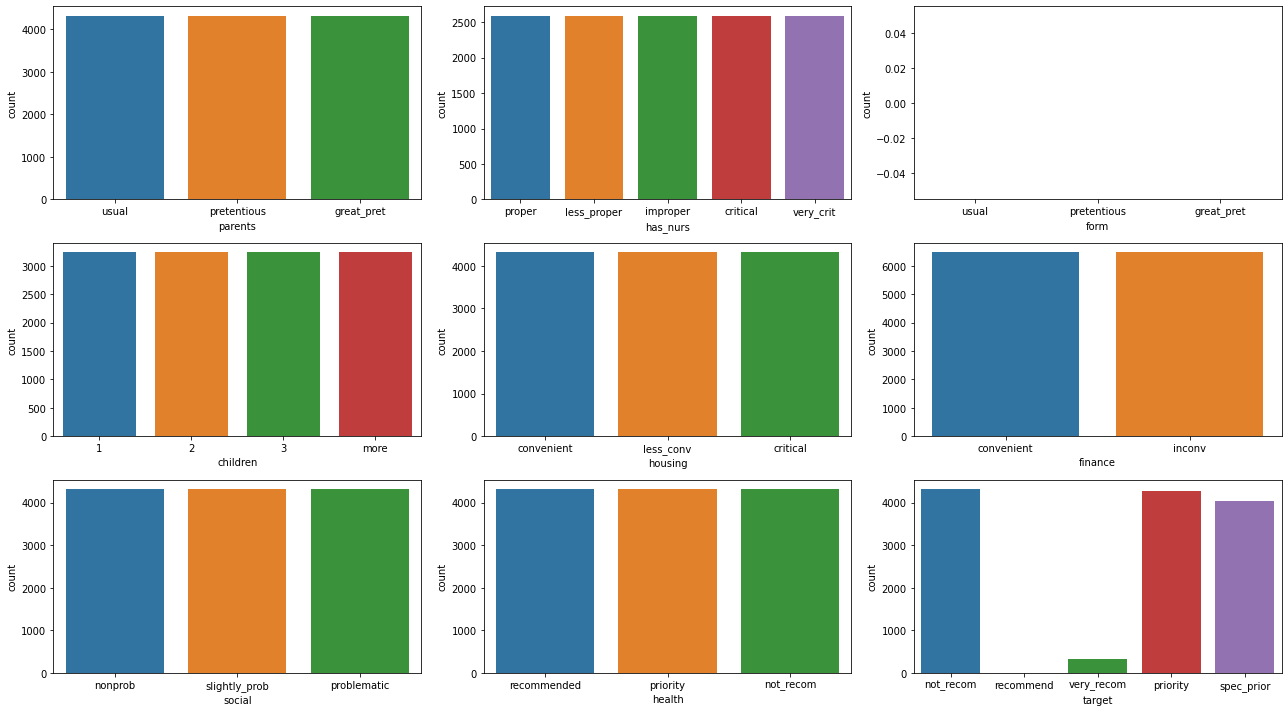

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(18, 10)
axs = axs.flatten()
colnames = df.columns.tolist()

for ax, col in zip(axs, colnames):
    sns.countplot(x=col, data=df, ax=ax)
plt.tight_layout()

#### Some observations 

The target class observation is interesting, almost no observations are labelled as recommended, very few are very recommended; most of them are not recommended, recommended with priority or recommended with special priority. 

### Bar plot of the target labels distributed within the various features

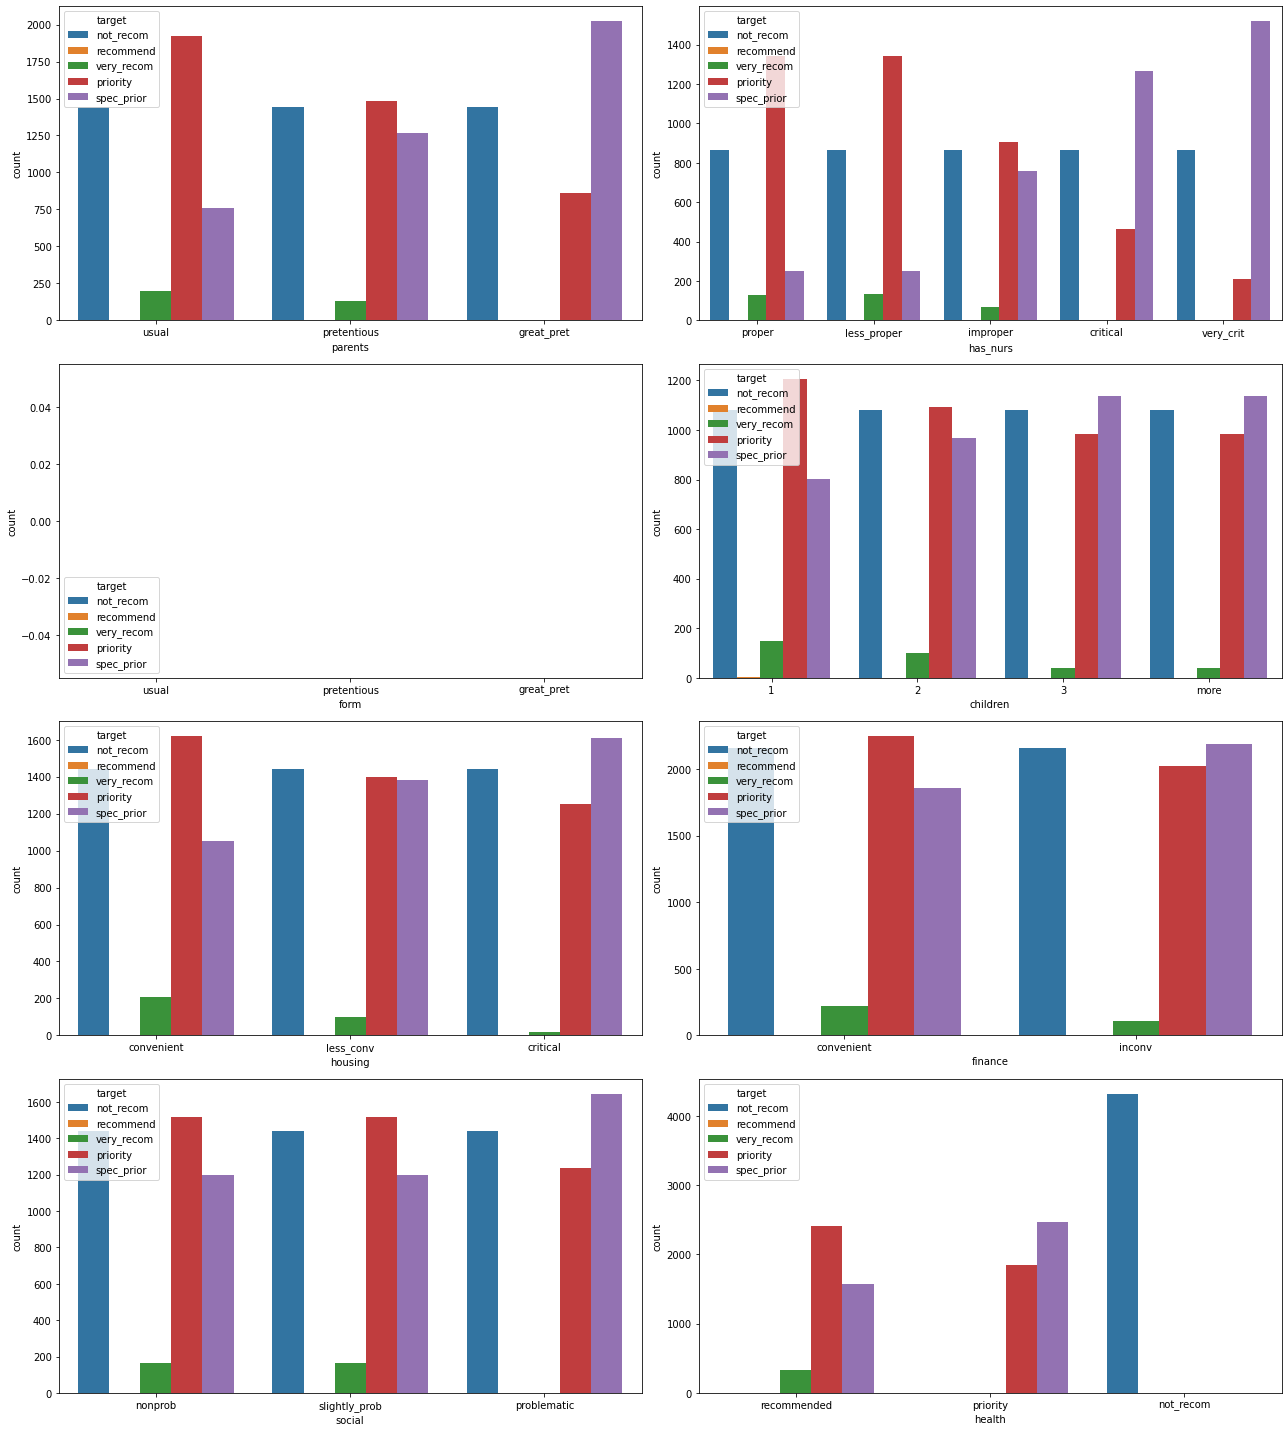

In [15]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(18, 20)

axs = axs.flatten()

for col, ax in zip(features, axs):
    sns.countplot(x=col, hue="target", data=df, ax=ax)
    
plt.tight_layout()

#### Some observations

There seems to be some correlation between the family's health status and the acceptance outcome.

In particular, in the last plot, we clearly see that if the health status of the family does not recommend final acceptance, the final decision will be to not recommend the child.

### The correlation matrix between the features and the target 

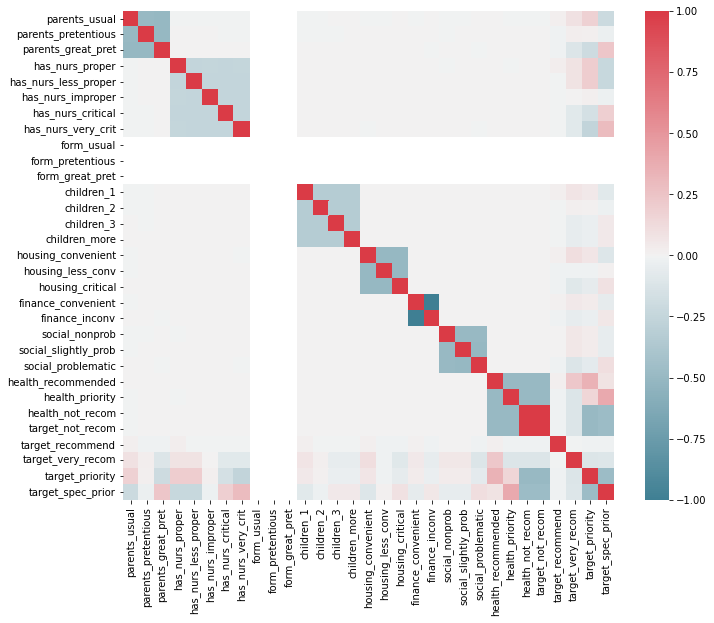

In [16]:
#using a heatmap to see what's going on

fig, ax = plt.subplots(figsize=(11, 9))

# the computer does not know how to calculate correlation on categories; 
# we need toone-hot encode each feature in order to get binary variables, 
# for which correlation is easy to compute
df1 = pd.get_dummies(df)

# some color palette to make the plot visually appealing...
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df1.corr(), ax=ax, cmap=cmap)

#### Some Observations

The correlation between target_not_recom and health_not_recom is 1.0. At the same time, finance_convenient is perfectly negatively correlated with finance_inconv which means the two columns are complements.

## 2- Data Preprocessing <a name="2"></a>

In order to do any training with the dataset, we need to first preprocess the data. Data preprocessing plays a major role before applying any algorithm.

### Separate the target in another variable

In [17]:
target = df['target']
dataset = df.drop(['target'], axis=1)
# some statistics
print("Dataframe columns after removing 'target':\n", dataset.columns.tolist())
# Since all the dataframe columns are categorical, 
# dataset.describe() will find unique values and the frequency of top repeated value in each columns
dataset.describe()

Dataframe columns after removing 'target':
 ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']


,parents,has_nurs,form,children,housing,finance,social,health
count,12960,12960,0,12960,12960,12960,12960,12960
unique,3,5,0,4,3,2,3,3
top,usual,proper,NaN,1,convenient,convenient,nonprob,recommended
freq,4320,2592,NaN,3240,4320,6480,4320,4320


### Checking for any missing data in the dataset

In [18]:
print(df.isnull().any())

parents     False
has_nurs    False
form         True
children    False
housing     False
finance     False
social      False
health      False
target      False
dtype: bool


From above, we get to know that there are no missing values in the dataset. So we can now proceed with preparing the dataset.

### Converting the target variables values into binary values

We need to convert the dataset which is in the form of strings to numbers.

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder_class = LabelEncoder()
bin_target = label_encoder_class.fit_transform(target)
print(target[:5].values)
print(bin_target[:5])

['recommend', 'priority', 'not_recom', 'recommend', 'priority']
Categories (5, object): ['not_recom' < 'recommend' < 'very_recom' < 'priority' < 'spec_prior']
[2 1 0 2 1]


### Using One-Hot-Encoding for the features

In [20]:
dataset = pd.get_dummies(dataset, drop_first= True) # to avoid dummy variable trap
print("No. of encoded columns: ", dataset.shape[1])
dataset.head()

No. of encoded columns:  18


,parents_pretentious,parents_great_pret,has_nurs_less_proper,has_nurs_improper,has_nurs_critical,has_nurs_very_crit,form_pretentious,form_great_pret,children_2,children_3,children_more,housing_less_conv,housing_critical,finance_inconv,social_slightly_prob,social_problematic,health_priority,health_not_recom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## 3- Split The Dataset <a name="3"></a>

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, bin_target, test_size=0.2,random_state=0)

## 4- Build The Benchmark Model <a name="4"></a>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
results={}
results["Logistic Regression"] = {}
Log_Reg = LogisticRegression()
Model1 = Log_Reg.fit(X_train,y_train)
print("Benchmark model trained succesfully.")

Benchmark model trained succesfully.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [23]:
CrossValid_LR=cross_val_score(Log_Reg, X_train, y_train, scoring="accuracy", cv=10).mean()
print("Logistic Regression Cross Validation",CrossValid_LR)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

Logistic Regression Cross Validation 0.9192711377860847


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 5. Build Models <a name="5"></a>

Machine learning models that will be used for this problem:

- Decision Tree classifier

- SVM



### Training the decision tree model

In [24]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier()
Model2=Decision_Tree.fit(X_train,y_train)
print("Decision Tree model trained succesfully.")

Decision Tree model trained succesfully.


### Training the SVM model

In [25]:
from sklearn.svm import SVC
SVM = SVC(random_state=42)
Model3 = SVM .fit(X_train,y_train)
print("SVM model trained succesfully.")

SVM model trained succesfully.


## 6- Evaluation <a name="6"></a>

 Evaluating the accuracy metric, prediction time and cross validation of each model

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### Logistic Regression evalutaion metrics

In [27]:
start = time() 
y_pred_test_Model1 = Model1.predict(X_test)
y_pred_train_Model1 = Model1.predict(X_train)
end = time() 
results["Logistic Regression"]['prediction_time'] = end - start
results["Logistic Regression"]['accuracy_train'] = accuracy_score(y_train, y_pred_train_Model1)
results["Logistic Regression"]['accuracy_test'] = accuracy_score(y_test, y_pred_test_Model1)
print(" Logistic Regression evaluation metrics have been recorded succesfully.")

 Logistic Regression evaluation metrics have been recorded succesfully.


### Decision Tree evaluation metrics

In [28]:
CrossValid_DT=cross_val_score(Decision_Tree, X_train, y_train, scoring="accuracy", cv=10).mean()
print("Decision Tree Cross Validation",CrossValid_DT)

Decision Tree Cross Validation 0.9405876395751035


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


In [29]:
results["Decision Tree"] = {}
start = time() 
y_pred_test_Model2 = Model2.predict(X_test)
y_pred_train_Model2 = Model2.predict(X_train)
end = time() 
results["Decision Tree"]['prediction_time'] = end - start
results["Decision Tree"]['accuracy_train'] = accuracy_score(y_train, y_pred_train_Model2)
results["Decision Tree"]['accuracy_test'] = accuracy_score(y_test, y_pred_test_Model2)
print(" Decision Tree evaluation metrics have been recorded succesfully.")

 Decision Tree evaluation metrics have been recorded succesfully.


### SVM evalutaion metrics

In [30]:
CrossValid_SVM=cross_val_score(SVM, X_train, y_train, scoring="accuracy", cv=10).mean()
print("SVM Cross Validation",CrossValid_SVM)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


SVM Cross Validation 0.9597806823216659


In [31]:
results["SVM"] = {}
start = time() 
y_pred_test_Model3 = Model3.predict(X_test)
y_pred_train_Model3 = Model3.predict(X_train)
end = time() 
results["SVM"]['prediction_time'] = end - start
results["SVM"]['accuracy_train'] = accuracy_score(y_train, y_pred_train_Model3)
results["SVM"]['accuracy_test'] = accuracy_score(y_test, y_pred_test_Model3)
print("SVM evaluation metrics have been recorded succesfully.")


SVM evaluation metrics have been recorded succesfully.


### Display all evaluation results

Now we have all the needed information to make a decision about the best classifier.

In [32]:
# display(results)
results_df = pd.DataFrame(results)
transposed_results = results_df
results_df = results_df.T
display(results_df)

,prediction_time,accuracy_train,accuracy_test
Logistic Regression,0.006191,0.921971,0.932485
Decision Tree,0.005617,0.966242,0.954475
SVM,2.578659,0.964892,0.969136


#### Results Interpretation:

The above table shows that **Decision Tree** is the best model.

**Decision Tree** has an accuracy of 100% at training and 99.57% at testing but when using cross validation its accuracy is 99%. In terms of time, it was the fastest model to predict new data points. 

**SVM** has 96.58% training accuracy and 96.83% testing accuracy but for cross validation its accuracy is 95.726%. It didn’t take short time for prediction compared by the decision tree model, SVM has the longest prediction time.

**Logistic Regression** model scored 91.46% training accuracy and 92.28% testing accuracy with short prediction time.


### Plotting the results 

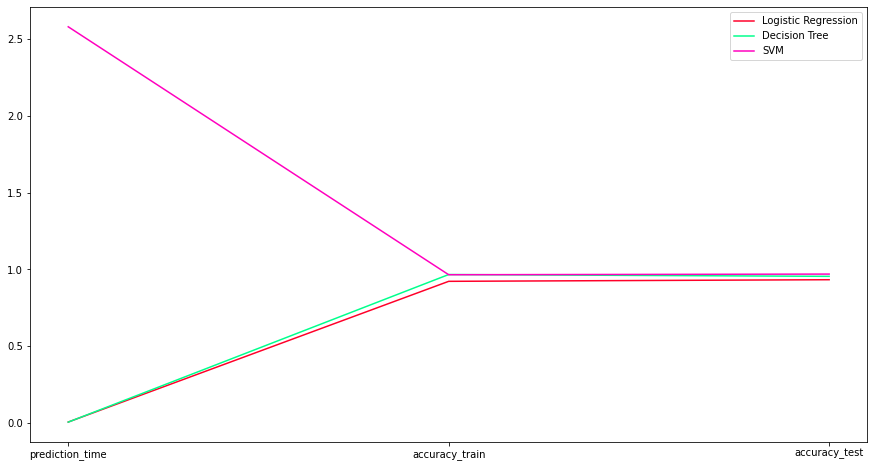

In [33]:
rev_res = transposed_results.reset_index()
rev_res = rev_res.rename(columns={"index":"metric"})
ax = rev_res.plot(xticks=rev_res.index, figsize=(15,8), colormap='gist_rainbow')
ax.set_xticklabels(rev_res["metric"]);

According to the above information and to the cross validation results, the **Decision Tree** is chosen as the best model.

## 7-Validation <a name="7"></a>

To enhance the chosen model

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],'max_depth': [2,5,10,15,None]}

grid_obj = GridSearchCV(Model2, param_grid=parameters, scoring='accuracy', cv=10)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


In [35]:
best_predictions = best_clf.predict(X_test)
tuned_scores = cross_val_score(best_clf, X_train, y_train, cv=10, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


In [36]:
# default and optimized models accuracies
print("Decision Tree Classifier Results:\n")
print("Unoptimized Model Testing Accuracy: {:.4f}".format(results['Decision Tree']['accuracy_test']))
print("Unoptimized Model Cross Validation Score: {:.4f}\n".format(CrossValid_DT))

print("Optimized Model Testing Accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Optimized Model Cross Validation Score: {:.4f}\n".format(tuned_scores.mean()))

Decision Tree Classifier Results:

Unoptimized Model Testing Accuracy: 0.9545
Unoptimized Model Cross Validation Score: 0.9406

Optimized Model Testing Accuracy: 0.9564
Optimized Model Cross Validation Score: 0.9482



**The optimized model has the same accuracy as the default one**

### Display Best Parameters of the chosen model

In [37]:
print("Best 'Decision Tree' parameters values after tuning:")
display(pd.DataFrame(grid_obj.best_params_, index=['best parameters values']))

Best 'Decision Tree' parameters values after tuning:


,criterion,max_depth
best parameters values,gini,10


### Check the final model with the benchmark model

In [38]:
display(results_df.iloc[[0,1]])

,prediction_time,accuracy_train,accuracy_test
Logistic Regression,0.006191,0.921971,0.932485
Decision Tree,0.005617,0.966242,0.954475


### Plotting the most 10 important features in making the decision

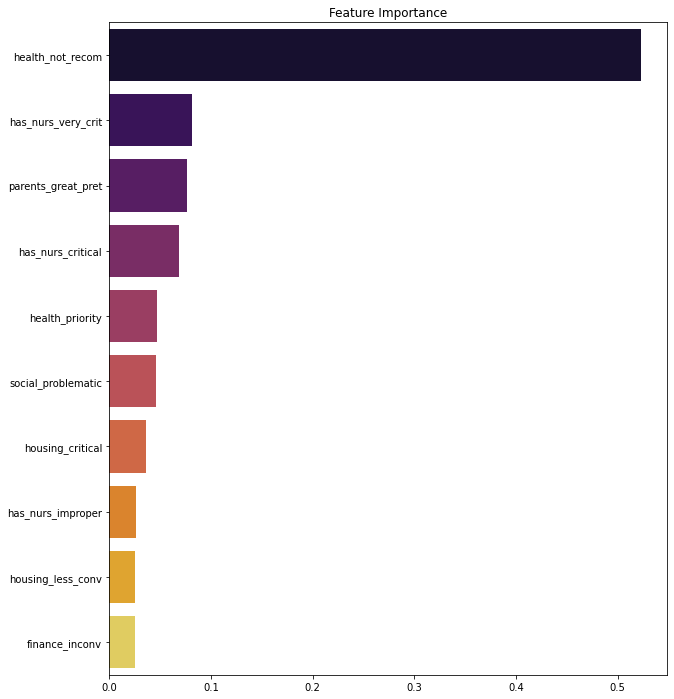

In [39]:
plt.figure(figsize=(10,12))
plt.title("Feature Importance")
imp = pd.Series(data=best_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:10]
ax = sns.barplot(y=imp.index, x=imp.values, palette="inferno", orient='h')

#### Some observations

Some values from 'health', 'has_nurs', 'parents', 'social', 'housing', 'children' where considered the most important factors in our classification.

This is related by our observations during examining the relationship between each column and the target variable in the 'Data Analysis' section, It's a good indicator that our model is reliable.

## Conclusion

Our problem was to classify the child as "not_recommended, recommended, very_recommended, priority and spec_priority" using a machine learning model that can predict the category of each child based on his/her features.

The dataset used for this problem was obtained from 'UCI Machine Leanring Repository', It is a textual data with 12960 rows and 8 columns. All the columns contained categorical values, the 'Nursery' column was our target variable. 

**First** : we started with data exploration to find the distribution of each column, and then we plotted every column against the target variable to see if we can predict the behavior of the model. 

**Second**: we preprocessed the data by using one-hot-encoding technique.

**Third** : we created the benchmark model **Logistic Regression **, and built two other models (Decision Tree, SVC) to make a comparison between all of them. 

**Decision Tree** was the best model becuase it scored accuracy of 100% at training and 99.57% at testing and about 99% cross validation accuracy 

**Finally** : we implemented the hyper-paramet tuning technique to find best parameters for our model, and to find the important features in our data.